# Dataset visualization notebook
This notebook that visualize the custom dataset that was written into the hard drive for sanity checking
Reference:
- [https://www.immersivelimit.com/tutorials/create-coco-annotations-from-scratch](https://www.immersivelimit.com/tutorials/create-coco-annotations-from-scratch)
- [https://www.kaggle.com/code/jeanpat/minimalist-mask-to-coco-format-dataset-conversion](https://www.kaggle.com/code/jeanpat/minimalist-mask-to-coco-format-dataset-conversion)

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from PIL import Image

In [3]:
%matplotlib inline

# Instance segmentation dataset

In [15]:
#coco_captions = COCO('/jupyter-users-home/tan-2enguyen/datasets/pathology/quilt1m/quilt_coco/annotations/train_captions.json')
#image_id = 43

#coco_captions = COCO('/jupyter-users-home/tan-2enguyen/datasets/detectron2/coco/annotations/captions_val2017.json')
#image_id = 397133


coco = COCO("/jupyter-users-home/tan-2enguyen/datasets/pathology/anno_caption_merged/annotations/val_instances.json")
coco_captions = COCO('/jupyter-users-home/tan-2enguyen/datasets/pathology/anno_caption_merged/annotations/val_captions.json')
img_dir = "/jupyter-users-home/tan-2enguyen/datasets/pathology/anno_caption_merged/images"
image_id = 58400


img = coco.imgs[image_id]
img_dir = "/jupyter-users-home/tan-2enguyen/datasets/pathology/anno_caption_merged/images"


# Get the ids of the captions
caption_annotation_ids = coco_captions.getAnnIds(imgIds=image_id)
print(caption_annotation_ids)
captions = coco_captions.loadAnns(caption_annotation_ids)
print(img)
print(captions)

loading annotations into memory...
Done (t=0.96s)
creating index...
index created!
loading annotations into memory...
Done (t=0.49s)
creating index...
index created!
[53106]
{'license': 1, 'file_name': '58400.jpg', 'coco_url': '', 'height': 512, 'width': 512, 'date_captured': '', 'flickr_url': '', 'id': 58400}
[{'id': 53106, 'image_id': 58400, 'caption': 'Features include beading, which some thought might be a lichen.'}]


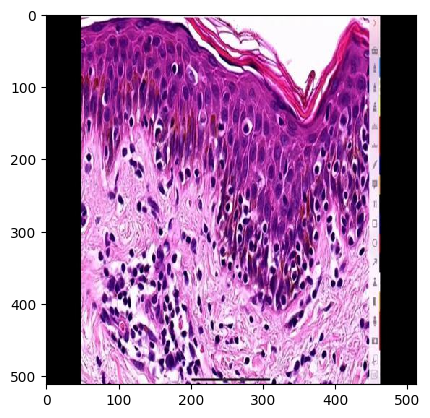

In [16]:
image = np.array(Image.open(os.path.join(img_dir, img['file_name'])))
plt.imshow(image, interpolation='nearest')

cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)

plt.show()

inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, connective cell, dead cell, dead cell


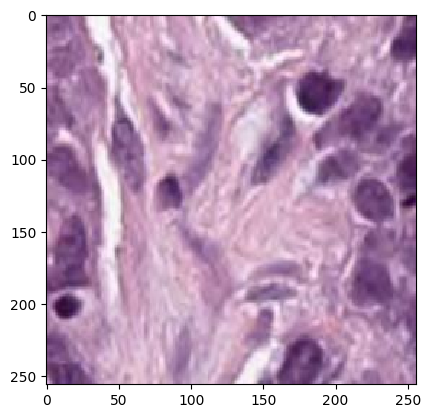

In [6]:
coco_captions.showAnns(captions)
image = np.array(Image.open(os.path.join(img_dir, img['file_name'])))
plt.imshow(image, interpolation='nearest')


In [69]:
anns_ids

[]

In [59]:
anns

[]